In [1]:
# change run-time to CUDA (GPU)
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!pip install imutils
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import cv2
import time
import splitfolders

import numpy as np
import pandas as pd
import tensorflow as tf
import torch
import matplotlib.pyplot as plt

from torch import nn
from torchvision import models
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from imutils import paths

In [4]:
# importing training set annotation file from directory
df = pd.read_csv("/content/drive/MyDrive/logos_dataset/logos_dataset_training_set_annotation.txt", sep='\s+',header=None)
df

,0,1,2,3,4,5,6
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
...,...,...,...,...,...,...,...
4531,2126991906.jpg,Yahoo,6,15,6,253,54
4532,217288720.jpg,Yahoo,6,136,161,304,222
4533,2472817996.jpg,Yahoo,6,2,4,499,106
4534,2514220918.jpg,Yahoo,6,1,69,342,157


In [5]:
X = df.iloc[:,0]
Y = df.iloc[:,1]

In [6]:
# path of logo-image file from directory
dtdir = '/content/drive/MyDrive/logos_dataset/logos_dataset_images'
im = df[0][0]
img = os.path.join(dtdir,im)

Dimension of the image: (210, 280, 3)


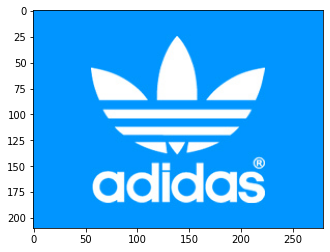

In [7]:
# visualzing a logo-image from the dataset in RGB color format
im_bgr = cv2.imread(img)
image = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print("Dimension of the image:",image.shape)

In [8]:
# ignoring the first 2 columns from the annotations and converting it to a list
size = df.iloc[:,3:]
size = size.values.tolist()

Dimension of the cropped image: (130, 196, 3)


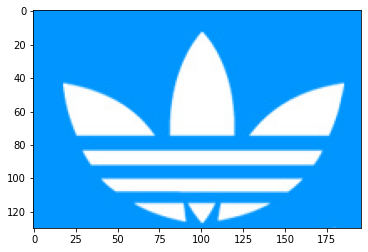

In [9]:
# cropping the logo-image based on the annotation values
image = image[size[0][1]:size[0][3],size[0][0]:size[0][2]]
plt.imshow(image)
print("Dimension of the cropped image:",image.shape)

In [10]:
# importing query set annotation file from directory
query = pd.read_csv("/content/drive/MyDrive/logos_dataset/logos_dataset_query_set_annotation.txt", sep='\s+',header=None)
query

,0,1
0,2403695909.jpg,Adidas
1,2912587920.jpg,Adidas
2,3441398196.jpg,Adidas
3,4605630935.jpg,Adidas
4,4606245138.jpg,Adidas
...,...,...
265,3480640208.jpg,none
266,3486224308.jpg,none
267,3486430785.jpg,none
268,3490185235.jpg,none


In [11]:
A = query.iloc[:,0]
B = query.iloc[:,1]

Dimension of the image: (500, 437, 3)


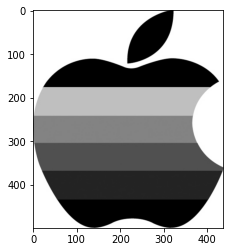

In [12]:
# visualzing a logo-image from the dataset in RGB color format
img = os.path.join(dtdir,query[0][5])
im_bgr = cv2.imread(img)
image = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
print("Dimension of the image:",image.shape)

In [13]:
# removing multiple occurences of same label and sorting them
y = list(set(list(Y)))
y.sort()
print(y)

['Adidas', 'Apple', 'BMW', 'Citroen', 'Cocacola', 'DHL', 'Fedex', 'Ferrari', 'Ford', 'Google', 'HP', 'Heineken', 'Intel', 'McDonalds', 'Mini', 'Nbc', 'Nike', 'Pepsi', 'Porsche', 'Puma', 'RedBull', 'Sprite', 'Starbucks', 'Texaco', 'Unicef', 'Vodafone', 'Yahoo']


In [14]:
# creating directory for each label
dest = "/content/drive/MyDrive/logos_dataset/LOGOS"
for i in y:
    try:
        os.makedirs(os.path.join(dest,i))
    except:
        pass

In [15]:
# removing the corrupt images from the dataset
for i in range(len(X)):
    try:
        destrain = os.path.join(dest,Y[i])
        savepath = os.path.join(destrain,X[i])
        img  = os.path.join(dtdir,X[i])
        image = cv2.imread(img)
        image = image[size[i][1]:size[i][3],size[i][0]:size[i][2]]
        image = cv2.resize(image,(224,224))
        cv2.imwrite(savepath,image)
    except:
        print('File corrupted!')
        pass

File corrupted!
File corrupted!
File corrupted!
File corrupted!
File corrupted!


In [16]:
# removing the corrupt images from the dataset
for i in range(len(A)):
    try:
        destrain = os.path.join(dest,B[i])
        savepath = os.path.join(destrain,A[i])
        img  = os.path.join(dtdir,A[i])
        image = cv2.imread(img)
        image = cv2.resize(image,(224,224))
        cv2.imwrite(savepath,image)
    except:
        print('File corrupted!')
        pass

In [17]:
# storing all the paths of the logo-images 
imagePaths = list(paths.list_images(dest))

/content/drive/MyDrive/flickr_logos_27_dataset/LOGOS/Apple/2401584750.jpg


(224, 224, 3)

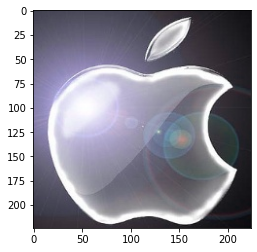

In [18]:
# visualizing one of the logo-images
img = imagePaths[40]
print(img)
image = cv2.imread(img)
plt.imshow(image)
image.shape

In [19]:
# splitting dataset into 80% for training and 20% for validation
splitfolders.ratio(dest, output="/content/drive/MyDrive/logos_dataset/data", seed=42, ratio=(0.8,0.2))

Copying files: 944 files [00:10, 90.20 files/s] 


In [20]:
# initializing our data augmentation functions
resize = transforms.Resize(size=(224,224))
hFlip = transforms.RandomHorizontalFlip(p=0.25)
vFlip = transforms.RandomVerticalFlip(p=0.25)
rotate = transforms.RandomRotation(degrees=15)
coljtr = transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1)
raf = transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15)
rrsc = transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0))
ccp  = transforms.CenterCrop(size=224)  # Image net standards
nrml = transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])  # Imagenet standards

In [21]:
# initializing our training and validation set data augmentation
# pipeline
trainTransforms = transforms.Compose([resize,hFlip,vFlip,rotate,raf,rrsc,ccp,coljtr,transforms.ToTensor(),nrml])
valTransforms = transforms.Compose([resize,hFlip,vFlip,rotate,raf,rrsc,ccp,coljtr,transforms.ToTensor(),nrml])

In [22]:
# initializing the training and validation dataset
print("[INFO] loading the training and validation dataset...")
trainDataset = ImageFolder(root='/content/drive/MyDrive/logos_dataset/data/train',transform=trainTransforms)
valDataset = ImageFolder(root='/content/drive/MyDrive/logos_dataset/data/val', transform=valTransforms)
print("[INFO] training dataset contains {} samples...".format(len(trainDataset)))
print("[INFO] validation dataset contains {} samples...".format(len(valDataset)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 755 samples...
[INFO] validation dataset contains 189 samples...


In [23]:
# creating training and validation set dataloaders
print("[INFO] creating training and validation set dataloaders...")
trainDataLoader = DataLoader(trainDataset, batch_size=256, shuffle=True)
valDataLoader = DataLoader(valDataset, batch_size=256,shuffle=True)

[INFO] creating training and validation set dataloaders...


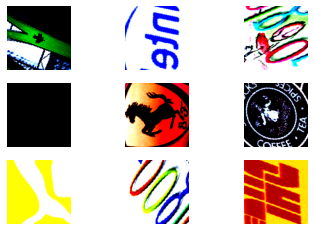

In [24]:
# iterating and printing the validation set dataloaders
examples = iter(valDataLoader)
example_data, example_targets = next(examples)
for i in range(9):
    plt.subplot(3,3,i+1)
    img =example_data[i].cpu().numpy().T
    plt.imshow(img)
    plt.axis("off")
plt.show() 

In [25]:
# printing the logos and their respective class numbers
print(trainDataset.class_to_idx)

{'Adidas': 0, 'Apple': 1, 'BMW': 2, 'Citroen': 3, 'Cocacola': 4, 'DHL': 5, 'Fedex': 6, 'Ferrari': 7, 'Ford': 8, 'Google': 9, 'HP': 10, 'Heineken': 11, 'Intel': 12, 'McDonalds': 13, 'Mini': 14, 'Nbc': 15, 'Nike': 16, 'Pepsi': 17, 'Porsche': 18, 'Puma': 19, 'RedBull': 20, 'Sprite': 21, 'Starbucks': 22, 'Texaco': 23, 'Unicef': 24, 'Vodafone': 25, 'Yahoo': 26}


In [34]:
# device in which the tensor will be allocated
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [64]:
# using mobilenet_v2 model architecture
mobilenet = models.mobilenet_v2(weights='MobileNet_V2_Weights.DEFAULT')
mobilenet.aux_logits=False

efficientnet = models.efficientnet_b0(weights='EfficientNet_B0_Weights.DEFAULT')
efficientnet.aux_logits=False

# freeze training for all layers
for param in mobilenet.parameters():
    param.requires_grad = False

for param1 in efficientnet.parameters():
    param1.requires_grad = False

# append a new classification top to our feature extractor and pop it on to the current device
num_feat = mobilenet.classifier[1].in_features
# num_feat1 = efficientnet.classifier[1].in_features

features = list(mobilenet.classifier.children())[:-1] # Remove last layer from mobilenet
# features1 = list(efficientnet.classifier.children())[:-1] # Remove last layer from efficientnet

features.extend([nn.Linear(num_feat, 256),
                 nn.Dropout(0.5),
                 nn.ReLU(inplace=True), 
                 nn.Linear(256, len(trainDataset.classes)),                   
                 nn.LogSoftmax(dim=1)]) # Add our layer with 4 outputs for mobilenet

# features1.extend([nn.Linear(num_feat1, 256),
#                  nn.Dropout(0.5),
#                  nn.ReLU(inplace=True), 
#                  nn.Linear(256, len(trainDataset.classes)),                   
#                  nn.LogSoftmax(dim=1)]) # Add our layer with 4 outputs for efficientnet

mobilenet.classifier = nn.Sequential(*features) # Replace the model classifier for mobilenet
# efficientnet.classifier = nn.Sequential(*features1) # Replace the model classifier for efficientnet

mobilenet = mobilenet.to(device)
efficientnet = efficientnet.to(device)

In [65]:
# loss and optimizer
loss_func = nn.NLLLoss()
optimizer = torch.optim.Adam(mobilenet.parameters())
optimizer1 = torch.optim.Adam(efficientnet.parameters())

In [66]:
# training function
def train(model, epoch):
  model.train()
  net_loss = 0
  correct = 0
  for batch_idx, (data, target) in enumerate(trainDataLoader):
    (data, target) = (data.to(device), target.to(device))
    optimizer.zero_grad()
    output = model(data)
    loss = loss_func(output, target)
    output = torch.exp(output)
    pred = output.data.max(1, keepdim=True)[1]
    correct += pred.eq(target.data.view_as(pred)).sum()
    loss.backward()
    optimizer.step()
    
    net_loss = net_loss + loss.item()
  acc = correct / len(trainDataLoader.dataset)
  return net_loss,acc

In [67]:
# testing function
def test(model):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in valDataLoader:
      (data, target) = (data.to(device), target.to(device))
      output = model(data)
      test_loss += loss_func(output, target).item()
      output = torch.exp(output)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(valDataLoader.dataset)
  acc = correct / len(valDataLoader.dataset)
  return test_loss,acc

In [68]:
# driver code
LOSSTR = []
ACCTE = []
LOSSTE = []
ACCTR = []

n_epochs = 50
for epoch in range(1, n_epochs + 1):
  start = time.time()
  print("--- Epoch {} ---".format(epoch))
  epoch_loss,tracc = train(mobilenet, epoch)
  LOSSTR.append(epoch_loss)
  ACCTR.append(tracc)
  print("\tTrain Accuracy = {} || Train Loss  = {} ".format(tracc,epoch_loss))
  tloss,tacc =  test(mobilenet)
  print("\tTest Accuracy =  {} || Test Loss = {} ".format(tacc,tloss))
  ACCTE.append(tacc)
  LOSSTE.append(tloss)
  stop = time.time()
  print("\tTraining time = ", (stop - start))

--- Epoch 1 ---
	Train Accuracy = 0.05165563151240349 || Train Loss  = 9.855955839157104 
	Test Accuracy =  0.24338623881340027 || Test Loss = 0.016994152119550757 
	Training time =  11.845110893249512
--- Epoch 2 ---
	Train Accuracy = 0.16556291282176971 || Train Loss  = 9.510423183441162 
	Test Accuracy =  0.3650793433189392 || Test Loss = 0.016415662866420846 
	Training time =  11.737223863601685
--- Epoch 3 ---
	Train Accuracy = 0.2807947099208832 || Train Loss  = 9.180036067962646 
	Test Accuracy =  0.40740740299224854 || Test Loss = 0.01565637790336811 
	Training time =  11.927876472473145
--- Epoch 4 ---
	Train Accuracy = 0.33112582564353943 || Train Loss  = 8.67899227142334 
	Test Accuracy =  0.5291005373001099 || Test Loss = 0.01468102011100325 
	Training time =  11.918506383895874
--- Epoch 5 ---
	Train Accuracy = 0.4000000059604645 || Train Loss  = 8.22582459449768 
	Test Accuracy =  0.5291005373001099 || Test Loss = 0.013849930788474109 
	Training time =  12.051727294921875

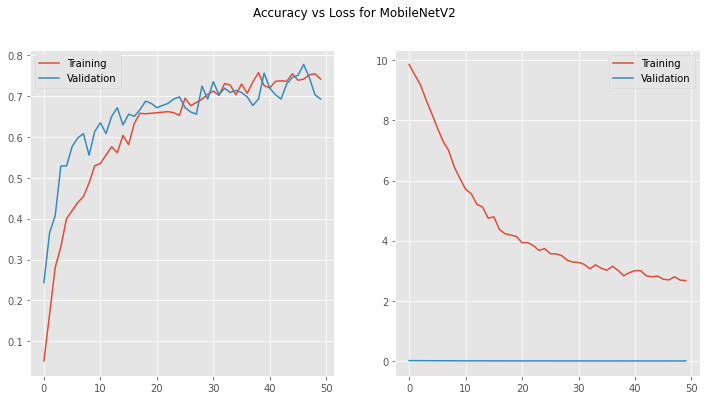

In [69]:
# plotting accuracy and loss for MobileNetv2
xx = np.arange(n_epochs)
plt.style.use("ggplot")

acctr = torch.Tensor(ACCTR).detach().cpu().numpy()
lsstr = torch.Tensor(LOSSTR).detach().cpu().numpy()
accte = torch.Tensor(ACCTE).detach().cpu().numpy()
lsste = torch.Tensor(LOSSTE).detach().cpu().numpy()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Accuracy vs Loss for MobileNetV2')
ax1.plot(xx, acctr,label='Training')
ax1.plot(xx,accte,label='Validation')
ax1.legend(loc="best")
ax2.plot(xx, lsstr,label='Training')
ax2.plot(xx, lsste,label='Validation')
ax2.legend(loc="best")
plt.show()

In [70]:
# driver code
LOSSTR1 = []
ACCTE1 = []
LOSSTE1 = []
ACCTR1 = []

n_epochs = 50
for epoch in range(1, n_epochs + 1):
  start = time.time()
  print("--- Epoch {} ---".format(epoch))
  epoch_loss,tracc = train(efficientnet, epoch)
  LOSSTR1.append(epoch_loss)
  ACCTR1.append(tracc)
  print("\tTrain Accuracy = {} || Train Loss  = {} ".format(tracc,epoch_loss))
  tloss,tacc =  test(efficientnet)
  print("\tTest Accuracy =  {} || Test Loss = {} ".format(tacc,tloss))
  ACCTE1.append(tacc)
  LOSSTE1.append(tloss)
  stop = time.time()
  print("\tTraining time = ", (stop - start))

--- Epoch 1 ---
	Train Accuracy = 0.04105960205197334 || Train Loss  = 9.930864810943604 
	Test Accuracy =  0.03703703731298447 || Test Loss = 0.017508412164355083 
	Training time =  11.975404024124146
--- Epoch 2 ---
	Train Accuracy = 0.03708609193563461 || Train Loss  = 9.959173679351807 
	Test Accuracy =  0.021164020523428917 || Test Loss = 0.01747933140507451 
	Training time =  11.966288566589355
--- Epoch 3 ---
	Train Accuracy = 0.02781457081437111 || Train Loss  = 9.915213108062744 
	Test Accuracy =  0.042328041046857834 || Test Loss = 0.01750953613765656 
	Training time =  11.89812707901001
--- Epoch 4 ---
	Train Accuracy = 0.03708609193563461 || Train Loss  = 9.932969093322754 
	Test Accuracy =  0.03703703731298447 || Test Loss = 0.017528025561539585 
	Training time =  11.948426723480225
--- Epoch 5 ---
	Train Accuracy = 0.042384106665849686 || Train Loss  = 9.94335651397705 
	Test Accuracy =  0.0317460298538208 || Test Loss = 0.017528368682457655 
	Training time =  11.78400015

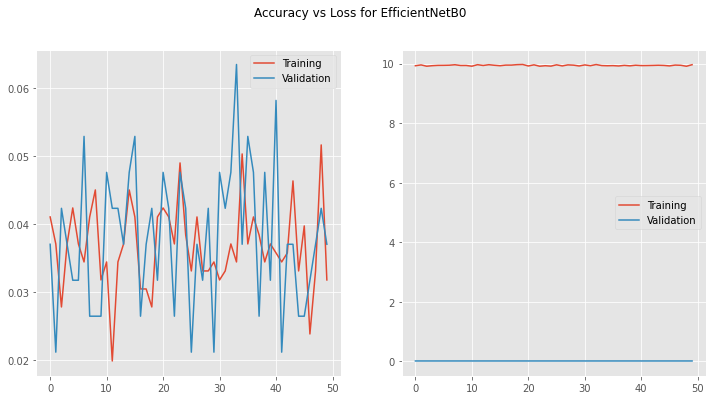

In [71]:
# plotting accuracy and loss for EfficientNetB0
xx1 = np.arange(n_epochs)
plt.style.use("ggplot")

acctr1 = torch.Tensor(ACCTR1).detach().cpu().numpy()
lsstr1 = torch.Tensor(LOSSTR1).detach().cpu().numpy()
accte1 = torch.Tensor(ACCTE1).detach().cpu().numpy()
lsste1 = torch.Tensor(LOSSTE1).detach().cpu().numpy()

fig1, (ax3, ax4) = plt.subplots(1, 2,figsize=(12,6))
fig1.suptitle('Accuracy vs Loss for EfficientNetB0')
ax3.plot(xx1, acctr1,label='Training')
ax3.plot(xx1,accte1,label='Validation')
ax3.legend(loc="best")
ax4.plot(xx1, lsstr1,label='Training')
ax4.plot(xx1, lsste1,label='Validation')
ax4.legend(loc="best")
plt.show()

In [72]:
# importing images for testing
testimage = list(paths.list_images('/content/drive/MyDrive/logos_dataset/logos_dataset_images'))

In [73]:
# function to predict the logo
def predict_image(model, path):
    image = Image.open(path)
    plt.imshow(image)
    plt.axis("off")
    plt.show() 
    model.eval()
    with torch.no_grad():
      img =  load_img(path)
      mean = [0.485, 0.456, 0.406] 
      std = [0.229, 0.224, 0.225]
      transform_norm = transforms.Compose([transforms.ToTensor(), 
      transforms.Resize((224,224)),transforms.Normalize(mean, std)])
      img_normalized = transform_norm(img).float()
      img_normalized = img_normalized.unsqueeze_(0)
      img = torch.from_numpy(np.asarray(img)).permute(2, 0, 1)
      img = img_normalized.to(device)
      output = model(img)
      output = torch.exp(output)
      #print(output)
      index = output.data.cpu().numpy().argmax()
      result = list(np.around(output.data.cpu().numpy()*100,1))
      print(result)
      print("Predicted class =",trainDataset.classes[index])

In [74]:
# saving the .h5 file
torch.save(mobilenet,'/content/drive/MyDrive/logos_dataset/mobilenet.h5')
torch.save(efficientnet,'/content/drive/MyDrive/logos_dataset/efficientnet.h5')

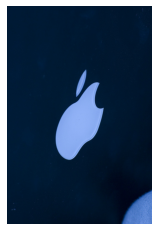

[array([ 4.9, 41.7,  0.2,  0.2,  0.2,  0. ,  0.3,  0. ,  4. ,  0. ,  1.8,
        0. ,  0.7,  0.2,  0.3,  0.1,  5.5,  0.6,  0. , 28.5,  0.4,  1.7,
        0.3,  0. ,  7.3,  0.9,  0.1], dtype=float32)]
Predicted class = Apple


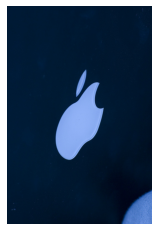

[array([3.4, 4.9, 3.9, 3.3, 4.3, 3.7, 3.5, 3.4, 4.2, 2.9, 3.4, 3.9, 3.7,
       4. , 3.6, 3.6, 3.9, 3.2, 3.6, 3.8, 3.8, 3.7, 4.1, 3.7, 3.2, 3.5,
       3.6], dtype=float32)]
Predicted class = Apple


In [81]:
# comparing the output of both the models
predict_image(mobilenet,testimage[123])
predict_image(efficientnet,testimage[123])

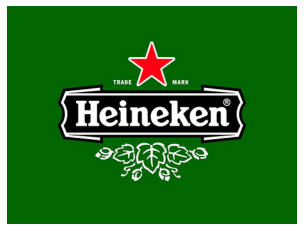

[array([ 1.3,  0.6,  0. ,  9.3,  4.8,  0.6,  0.3,  1.4,  0.5,  0.1,  2.4,
       41. ,  0.8,  6. ,  0.1,  0.8,  4.7,  1. ,  0.4, 12.1,  0.8,  0.9,
        1.5,  3.4,  0.8,  3.9,  0.4], dtype=float32)]
Predicted class = Heineken


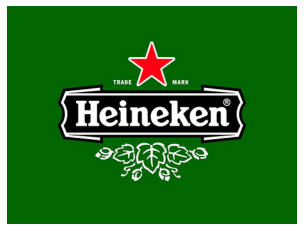

[array([3.6, 4.4, 3.5, 3.8, 3.9, 3.9, 3.8, 3.9, 3.8, 3.2, 3.4, 3.6, 3.5,
       3.4, 4.1, 4.6, 4.1, 3. , 3.3, 3.7, 3.5, 3.8, 3.5, 3.8, 3.8, 3.5,
       3.5], dtype=float32)]
Predicted class = Heineken


In [80]:
predict_image(mobilenet,testimage[188])
predict_image(efficientnet,testimage[188])

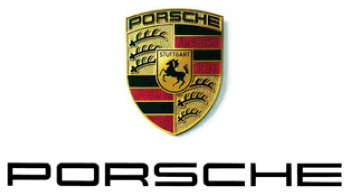

[array([ 0.4,  0.3,  0.1,  1.6,  3.6,  0.6,  0. ,  5.5,  1. ,  0.1,  2.5,
       34.3,  1.1,  2.6,  0. ,  0.6,  1.6,  5.2, 28.7,  0.8,  0.6,  0.2,
        2.9,  0.7,  0.8,  4. ,  0.3], dtype=float32)]
Predicted class = Porsche


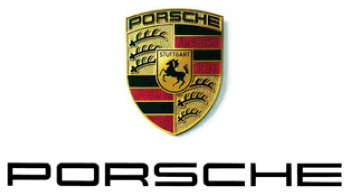

[array([3.6, 4.2, 3.4, 3.6, 4. , 3.3, 3.5, 3.7, 3.7, 2.9, 3.5, 3.2, 3.7,
       3.5, 4. , 3.4, 4.1, 3.1, 3.3, 3.9, 3.5, 4.1, 4.9, 4.8, 3.8, 3.8,
       3.5], dtype=float32)]
Predicted class = Porsche


In [82]:
predict_image(mobilenet,testimage[249])
predict_image(efficientnet,testimage[249])

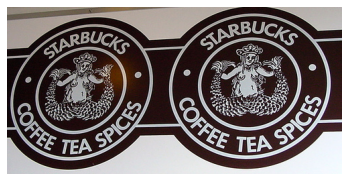

[array([ 0. ,  0. ,  0. ,  0.1,  2.8,  0.1,  0. ,  0.2,  0.5,  0. ,  0.1,
       18.7,  0.2,  0.2,  0.1,  0. ,  0. ,  0.1,  0.1,  0. ,  0.1,  0. ,
       75.8,  0. ,  0.1,  0.7,  0.1], dtype=float32)]
Predicted class = Starbucks


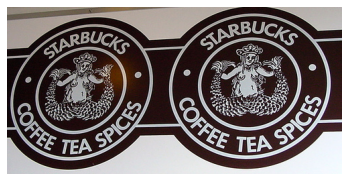

[array([4.2, 4.6, 3.5, 3.7, 3.9, 3.6, 3.4, 3.7, 3.4, 3.4, 3.9, 3.9, 3.8,
       3.4, 3.4, 3.7, 3.8, 3.2, 3.3, 3.4, 3.9, 4.1, 4.6, 3.6, 3.2, 4. ,
       3.2], dtype=float32)]
Predicted class = Starbucks


In [83]:
predict_image(mobilenet,testimage[367])
predict_image(efficientnet,testimage[367])

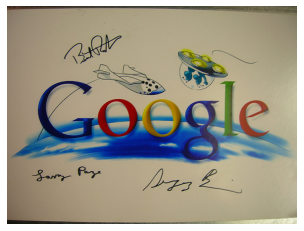

[array([ 0.1,  4.4,  0.1,  0.1,  0.7,  0.4,  4.2,  5.2,  0.3, 18.5,  0.6,
        5.3,  3.1,  3.5,  0. ,  1.5,  0.5,  1.9,  0.2,  3. , 13.5, 18. ,
        1.1,  1.7,  2.6,  3.2,  6.1], dtype=float32)]
Predicted class = Google


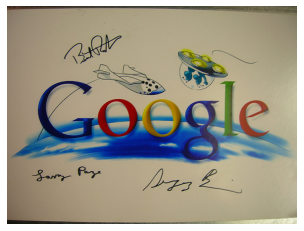

[array([3. , 4.8, 3.1, 3.5, 3.5, 3.7, 3. , 3.2, 4.2, 3.9, 3.8, 3.8, 3.5,
       3.5, 4. , 3.7, 4.1, 3.4, 3. , 4.2, 4. , 3.8, 4.5, 3.9, 3.5, 3.8,
       3.7], dtype=float32)]
Predicted class = Google


In [84]:
predict_image(mobilenet,testimage[526])
predict_image(efficientnet,testimage[526])

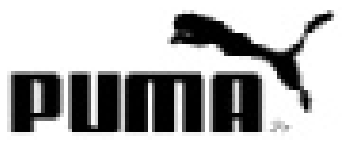

[array([ 1.2,  2.1,  0. ,  2.8,  0.5,  0.2,  0.2,  0.7,  0.3,  0. ,  5.4,
        0.5,  0.2,  0.6,  0.2,  0.4, 13.5,  0.2,  0.1, 67.8,  1.2,  0.2,
        0.1,  0.5,  0.3,  0.3,  0.4], dtype=float32)]
Predicted class = Puma


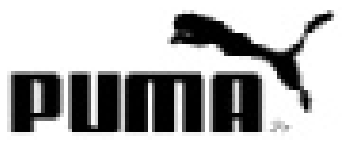

[array([3.3, 4.2, 4.4, 3.8, 4. , 3.5, 4.1, 3.5, 3.6, 3.2, 3.5, 3.8, 3.4,
       4. , 3.5, 3.6, 3.4, 3.5, 3.6, 3.8, 3.5, 3.3, 4.4, 4.2, 3.5, 4.1,
       3.2], dtype=float32)]
Predicted class = Puma


In [85]:
predict_image(mobilenet,testimage[710])
predict_image(efficientnet,testimage[710])

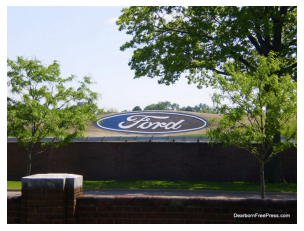

[array([ 0.9,  0.6,  0. ,  1.8,  2. ,  0.3,  0. ,  1.2, 10.2,  0. ,  1.3,
       50.7,  4.5,  6.6,  0.1,  0.8,  0.8,  1.5,  1.5,  1.6,  0.8,  5.8,
        4.8,  0.2,  1.1,  0.4,  0.2], dtype=float32)]
Predicted class = Ford


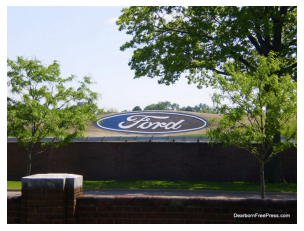

[array([3.6, 4.3, 3.8, 3.5, 3.8, 3.2, 3.3, 4.6, 3.8, 2.9, 3.9, 3.5, 3.4,
       3.4, 3.2, 3.8, 4.9, 3.5, 3.3, 3.3, 3.7, 3.7, 4. , 4.3, 3.8, 3.6,
       3.7], dtype=float32)]
Predicted class = Ford


In [86]:
predict_image(mobilenet,testimage[845])
predict_image(efficientnet,testimage[845])

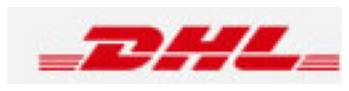

[array([ 1.5,  0.9,  0. ,  4.7,  9.5, 12.1,  0.3,  0.4,  0.3,  0.3,  1.1,
        1.9,  0.4,  3.6,  0.2,  4.7, 25.2,  5.1,  0.7, 11.5,  4.7,  0.3,
        0.1,  1.7,  0.9,  2.5,  5.4], dtype=float32)]
Predicted class = DHL


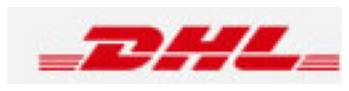

[array([3.7, 4. , 3.8, 3.4, 3.7, 3.4, 3.5, 3.3, 4.1, 3.5, 3.9, 3.9, 3.8,
       3.4, 3.6, 3.4, 3.7, 4. , 3.5, 3.5, 3.2, 4.3, 4.7, 4.4, 3.6, 3.8,
       3.2], dtype=float32)]
Predicted class = DHL


In [87]:
predict_image(mobilenet,testimage[904])
predict_image(efficientnet,testimage[904])